## CONTOURS
- We applied thresholding and edge detection to detect outlines and structures of objects in image.
- To access these outlines, we use contours
- This lesson includes finding and detecting contours in an image, along with extracting objects using contours, masks and cropping.

## FINGIND AND DRAWING CONTOURS
- If image is simple enough, we can directly use grayscsale as input.
- If image is complicated, we first objects using thresholing/edge detection and then find contours.

In [1]:
#%matplotlib inline
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from cv_imshow import show_image, create_subplot, display_image
import imutils
import matplotlib.image as mpimg

In [3]:
args = {
    "image" : "../../images/basic_shapes.png"
}

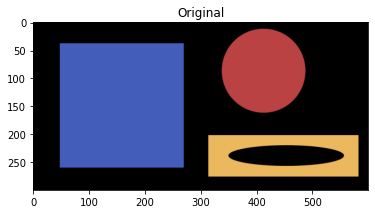

In [4]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image("Original", image)

### FUNCTIONS
- cv2.findContours:
    - cv2.RETR_LIST: Returns all contours. Other methods exist that return only external contours
        - cv2.RETR_EXTERNAL: Return only external most contours of each shape in image. Example, if this was specified below, the oval shape in the yellow rectangle would not be returned.
    - cv2.CHAIN_ARPPOX_SIMPLE: Compresses horizontal, vertical and diagonal segments of contours and leaves only their end points.
    - returns a tuple of values, each tuple contains points along a contour.
- imutils.grab_contours
    - The problem with the returning tuple is that it is in a different format for OpenCV 2.4, OpenCV 3, OpenCV 3.4, OpenCV 4.0.0-pre, OpenCV 4.0.0-alpha, and OpenCV 4.0.0 (official). 
    - The method in imutils solves this
- cv2.drawContours:
    - Draw returned contours on the clone of original image (or even a blank canvas), and provide thickness of the layer. (-1 for fill shape)

Found 4 contours


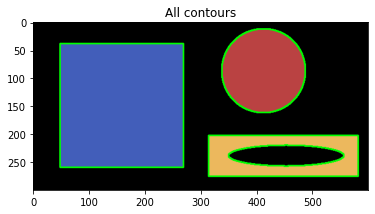

In [5]:
cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
clone = image.copy()
cv2.drawContours(clone, cnts, -1, (0,255,0), 2)
print("Found {} contours".format(len(cnts)))
display_image("All contours", clone)

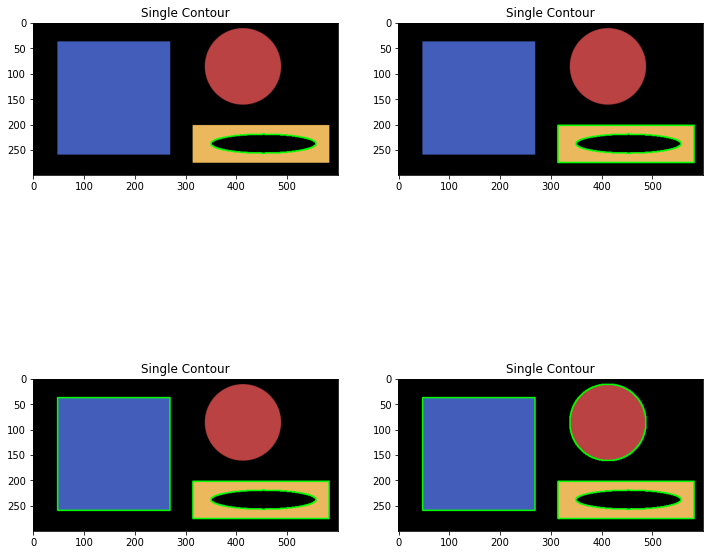

In [6]:
clone = image.copy()
fig = plt.figure(figsize=(12,12))
rows = 2
columns = 2
# loop over contours and draw each of them
for (i,c) in enumerate(cnts):
    cv2.drawContours(clone, [c], -1, (0,255,0), 2)
    create_subplot(fig, rows, columns, i+1, "Single Contour", clone)
    #display_image("Single contour", clone)

### Apply only external contours
- Use cv2.RETR_EXTERNAL instead of cv2.RETR_LIST

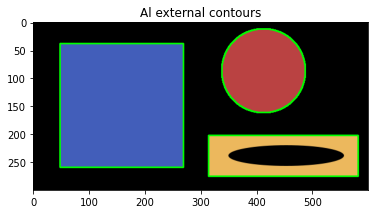

In [7]:
clone = image.copy()
# Use cv2.RETR_EXTERNAL instead of cv2.RETR_LIST
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cv2.drawContours(clone, cnts, -1, (0,255,0),2)
display_image("Al external contours", clone)

## USING CONTOURS AND MASKS TOGETHER

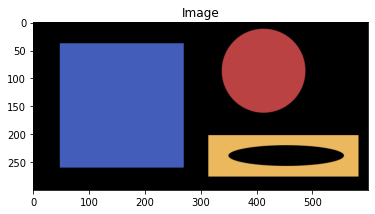

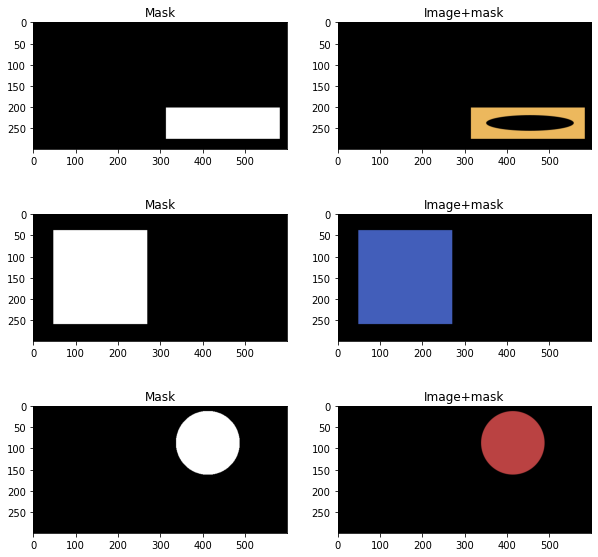

In [8]:
clone = image.copy()
display_image("Image", image)
fig=plt.figure(figsize=(10, 10))
rows = 3
columns = 2
for (i,c) in enumerate(cnts):
    mask = np.zeros(gray.shape, dtype='uint8')
    cv2.drawContours(mask, [c], -1, 255, -1)
    create_subplot(fig, rows, columns, 2*i+1,"Mask", mask)
    create_subplot(fig, rows, columns, 2*i+2, "Image+mask", cv2.bitwise_and(image, image, mask=mask))
plt.show()